# Genome assembly using Velvet

## Definition of the problem

The main goal of this part of the personal project is to practice and understand genome assembly using Velvet software. This latter uses short reads to build the genome (DNA) assembly by manipulating De Bruijn graphs.
The data presented in this notebook come from the tutorial reported in the README.md file and represent a part of *Staphylococcus aureus* genome (197,394 bp). We consider paired-end reads from Illumina sequencing device with 19X coverage on average. Interest of PE sequencing: alignment facility and detection of structural variations. 
We previously performed a de novo assembly using Velvet assembler (see tutorial), using FASTQC, MULTIQC, velveth, velvetg and QUAST.
In this notebook, we would like to perform analysis to discuss our results using different k values.

## Problematic

Which would be the effect(s) of different k values on the quality of genome assembly / contig lengths? Would there be other parameters that we could study to see how this genome assembly works and how to improve it?

## Resolution approaches

To answer this question, we will consider data from QUAST command line containing statistics on contigs. We will further perform statistical analysis of these datasets for different k values.

## Parameters

- k values (kmer lengths)

## Import modules and load files

In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
from glob import glob
import os

# Load TSV files
list_tsv = []

folder_files = glob('../../reports/velvet/quast/test_k_mers_*/report.tsv')

print("================================")
print("Folder_files")

for folder_file in folder_files:
    print(folder_file)
    data_kmers_x = pd.read_csv(folder_file, sep = "\t", index_col = 0)
    #nb_contigs = data_kmers_x[data_kmers_x["Assembly"] == "# contigs (>= 0 bp)"]
    nb_contigs = int(data_kmers_x.loc["# contigs (>= 0 bp)", "contigs"])
    if "/" in folder_file:
        new_folder_file = folder_file.split("/")[5]
        #print(new_folder_file)
        if "_" in new_folder_file:
            kmers = new_folder_file.split("_")[3]
    dict_tsv = {}
    dict_tsv["tsv_path"] = folder_file
    dict_tsv["tsv_name"] = os.path.basename(folder_file)
    dict_tsv["kmers"] = int(kmers)
    dict_tsv["# contigs"] = nb_contigs
    list_tsv.append(dict_tsv)

print("===============================")
print("List tsv")
print(list_tsv)
#print(folder_files)

print("===============================")
print("Dataframe")
df_ref = pd.DataFrame(data = list_tsv)
df_ref.info()
df_ref.head()

Folder_files
../../reports/velvet/quast/test_k_mers_31/report.tsv
../../reports/velvet/quast/test_k_mers_35/report.tsv
../../reports/velvet/quast/test_k_mers_39/report.tsv
../../reports/velvet/quast/test_k_mers_43/report.tsv
../../reports/velvet/quast/test_k_mers_47/report.tsv
../../reports/velvet/quast/test_k_mers_51/report.tsv
../../reports/velvet/quast/test_k_mers_55/report.tsv
../../reports/velvet/quast/test_k_mers_59/report.tsv
../../reports/velvet/quast/test_k_mers_63/report.tsv
../../reports/velvet/quast/test_k_mers_67/report.tsv
../../reports/velvet/quast/test_k_mers_71/report.tsv
../../reports/velvet/quast/test_k_mers_75/report.tsv
../../reports/velvet/quast/test_k_mers_79/report.tsv
../../reports/velvet/quast/test_k_mers_83/report.tsv
../../reports/velvet/quast/test_k_mers_87/report.tsv
../../reports/velvet/quast/test_k_mers_91/report.tsv
../../reports/velvet/quast/test_k_mers_95/report.tsv
../../reports/velvet/quast/test_k_mers_99/report.tsv
List tsv
[{'tsv_path': '../../rep

,tsv_path,tsv_name,kmers,# contigs
0,../../reports/velvet/quast/test_k_mers_31/repo...,report.tsv,31,161
1,../../reports/velvet/quast/test_k_mers_35/repo...,report.tsv,35,147
2,../../reports/velvet/quast/test_k_mers_39/repo...,report.tsv,39,145
3,../../reports/velvet/quast/test_k_mers_43/repo...,report.tsv,43,114
4,../../reports/velvet/quast/test_k_mers_47/repo...,report.tsv,47,86


In [6]:
data_31 = pd.read_csv("../../reports/velvet/quast/test_k_mers_31/report.tsv", sep = "\t", index_col = 0)
data_31.info()
data_31.head()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, # contigs (>= 0 bp) to LGA90
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   contigs  46 non-null     object
dtypes: object(1)
memory usage: 736.0+ bytes


,contigs
Assembly,
# contigs (>= 0 bp),161
# contigs (>= 1000 bp),41
Total length (>= 0 bp),186842
Total length (>= 1000 bp),170560
# contigs,47


In [7]:
int(data_31.loc["# contigs (>= 0 bp)", "contigs"])

161

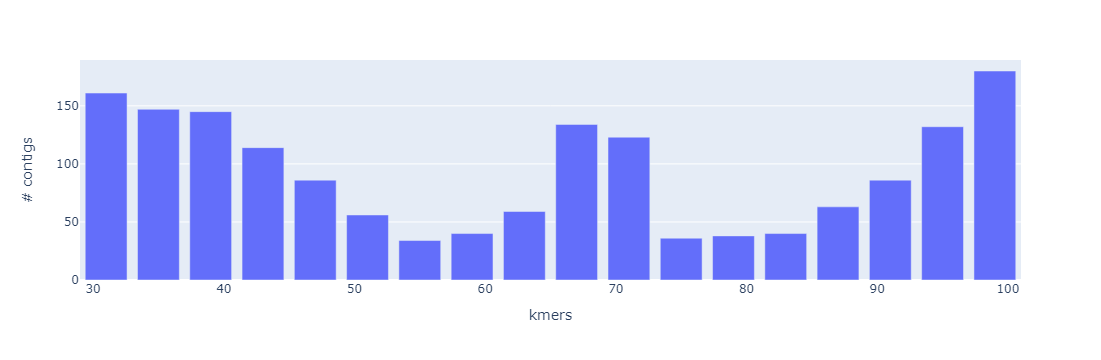

In [11]:
# Histogram
fig = px.bar(df_ref, x = "kmers", y = "# contigs", title = "Number of contigs vs. kmers size")
fig.show()